# <h1><center>*Predicting Application Acceptance*</center></h1>

# Goals:

 - Develop a machine learning model that prioritizes recall in identifying high-risk applicants to minimize potential damages caused by accepting them
 ___

# Imports

In [1]:
import pandas as pd
import numpy as np

import wrangle as w
import explore as e
#import modeling as m

import seaborn as sns
import matplotlib.pyplot as plt 

from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

---------------------------------------------------------------------------------------------------------------

# Acquire

 - Data acquired through CWS Apartment SQL Server.
 - Wrote a SQL query that included 6 different tables and converted to a CSV file
 - Wrote a function in my wrangle.py file that reads CSV file to extract the data
 - It contained 739,442 rows and 25 columns before cleaning
 - Each row represents a resident of the dataset
 - Each column represents a feature of the dataset 
 
 __________

# Prepare

 - Removed columns that were not useful
 - Checked for nulls in the data (column dropped later in pipeline)
 - Checked that column data types were appropriate
 - Renamed columns
 - Filtered data for what we were looking for 
 - Removed Outliers
 - Encoded variables that would promote useability for models
 - Created dummy variables for categorical variables
 - Added dummy variables to dataset
 - Split data into train, validate and test (approx. 56/24/20)
 
 
 _____

# Data Dictionary


| Target Variable |     Definition     |
| --------------- | ------------------ |
|      bad_resident    | 1 for resident that caused loss to company, 0 for otherwise |

| Feature  | Definition |
| ------------- | ------------- |
| id | Tenant Identification Number |
| total_charges | Total charges resident has incurred living at apartment   |
| amount_paid | Amount tenant has paid towards total charges |
| open |  0 is transaction total charge is closed -1 is transaction total charge open|
| charge_code | Code of a charge  |
| description | Description of a charge with date|
| prop_id | Related to property name and location  |
| charge_name | Name of a charge  |
| sStatus | Status of a tenant (current or past) |
| rent | Rent per month |
| term | Lease contract in months |  
| monthly_inc | Monthly income of a tenant |
| GuarantorRequired | If a tenant requires a guarrantor |
| total_inc | Yearly income of a tenant |
| Recommendation | Acceptance status of applicant |
| age | Age of a tenant |
| risk_score | Predetermined score of how risky an applicant is at the time of applying |
| reason | Reason that drove decision to recommedation |

_____

# A brief look at the data

In [2]:
# acquiring and cleaning the data
df = w.get_cws_data()

# splitting data into subsets of train, validate, test with X and y splits
train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = w.train_vailidate_test_split(df, 'bad_resident', 'bad_resident')

In [3]:
#displaying all columns and getting first 5 rows
train.head()

,id,total_charges,amount_paid,open,charge_code,description,prop_id,charge_name,sStatus,rent,term,monthly_inc,GuarantorRequired,total_inc,Recommendation,age,risk_score,reason,bad_resident
2707,63851,2.00,2.00,0,190,Pest control (02/2023),126,Pest control,Current,1639,12,3900,False,0,A-Criminal History Meets Requirements,27,0,Meets All Property Requirements,0
4983,73919,1650.00,1650.00,0,21,Deposit (Amounts subject to screening results),103,Deposit received,Current,1719,12,6600,False,75684,Accept with Conditions (Extra Deposit),31,745,NaN,0
4959,73653,4.00,4.00,0,180,Next Month's Administration Processing Fee,84,Administration processing fee,Current,1661,9,8176,False,221364,Accept with Conditions (Extra Deposit),37,687,Limited period of Employment History,0
4492,70961,0.33,0.33,0,190,Pest Control for 5 days,80,Pest control,Current,1579,14,5000,False,101976,Accept,29,782,Meets All Property Requirements,0
995,33019,1.17,1.17,0,190,Pest Control for 7 days,139,Pest control,Current,1779,13,7500,False,90000,Accept,31,724,Meets All Property Requirements,0


# A summary of the data

In [4]:
# a look at our column names, data types, and null counts
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2799 entries, 2707 to 4980
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2799 non-null   int64  
 1   total_charges      2799 non-null   float64
 2   amount_paid        2799 non-null   float64
 3   open               2799 non-null   int64  
 4   charge_code        2799 non-null   int64  
 5   description        2799 non-null   object 
 6   prop_id            2799 non-null   int64  
 7   charge_name        2799 non-null   object 
 8   sStatus            2799 non-null   object 
 9   rent               2799 non-null   int64  
 10  term               2799 non-null   int64  
 11  monthly_inc        2799 non-null   int64  
 12  GuarantorRequired  2799 non-null   bool   
 13  total_inc          2799 non-null   int64  
 14  Recommendation     2799 non-null   object 
 15  age                2799 non-null   int64  
 16  risk_score         27

# Explore

In [5]:
train.prop_id = train.prop_id.apply(e.states)

### *1. What is the average risk score?*

**Takeaways**

- TBD

____

### *2. Is risk score an indicator of a damage?*

**Takeaways**

- TBD

____

### *3. Is monthly/yearly income an indicator of a damage?*

**Takeaways**

- TBD

____

### *4. Is requirement of a guarantor  a good driver?*

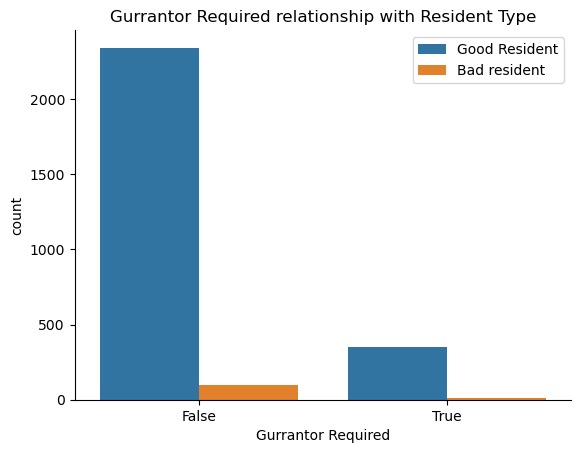

In [6]:
e.vis_countplot(train, col = 'GuarantorRequired')

**Takeaways**

- From graph, we can see that Guarantor required have very minimal affect on resident being bad resident


In [7]:
e.chi_test_g(train, col = 'GuarantorRequired')

Null Hypothesis: GuarantorRequired and bad_resident are independent

Alternative Hypothesis: GuarantorRequired and bad_resident are dependent

chi^2 = 0.15460781387865227
p     = 0.6941702916474859

We fail to reject null hypothesis
There appears to be no significant relationship between GuarantorRequired and bad_resident.


**Takeaways**

- From result of chi square test, we can say that Guarantor have no significant relations with bad resident.

____

### *5. Is there a relationship between rent and damages?*

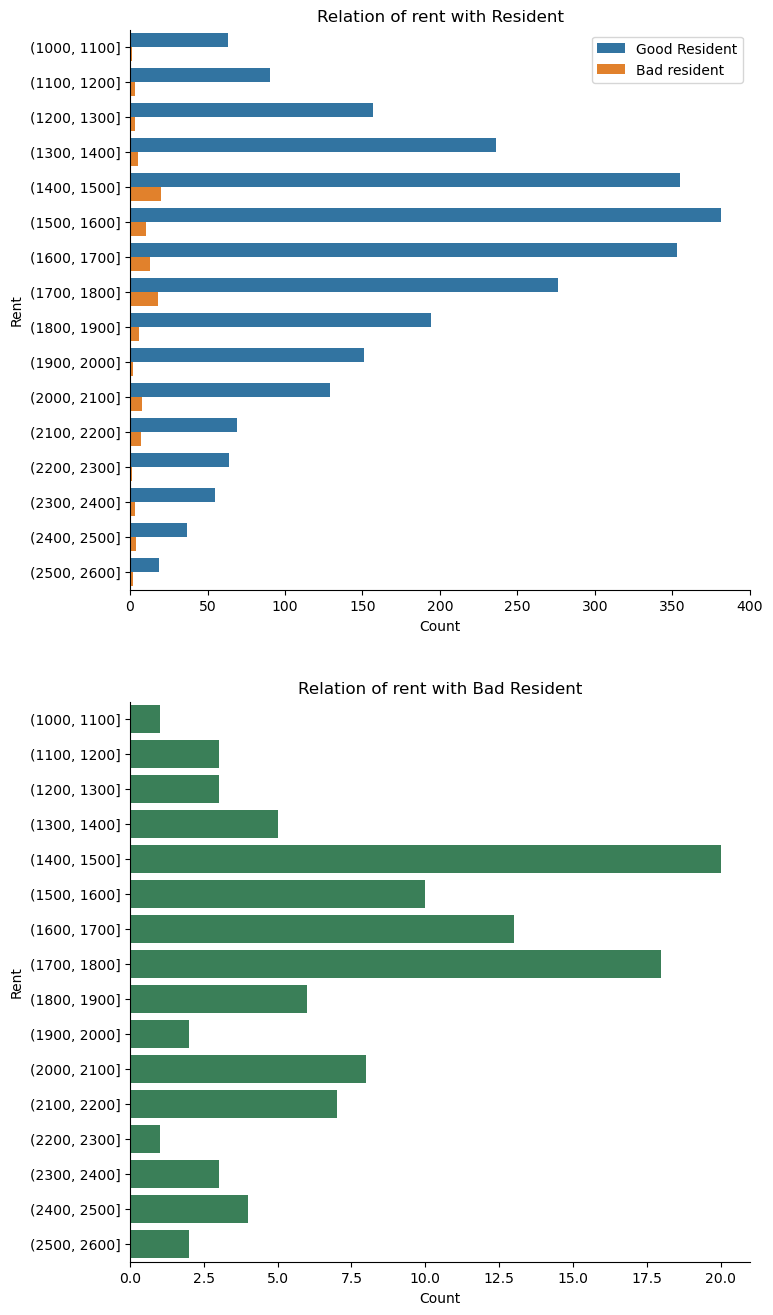

In [8]:
e.viz_rent(train, 'rent')

**Takeaways**

- From graph, we can say that residents with rent $1400-$1500 are considered as the bad resident.

____

### *6. Are certain age groups more likely to cause damage?*

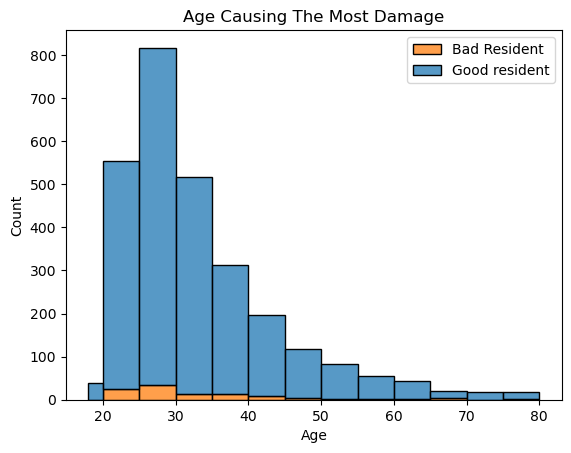

In [9]:
e.histplot_n(train, 'age')

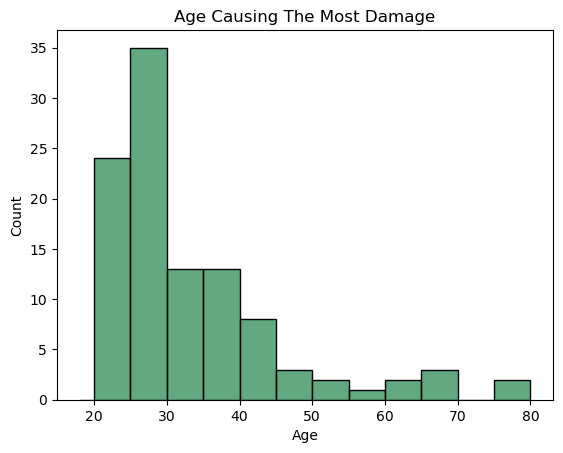

In [10]:
e.histplot_n(train, 'age', bad = True)

**Takeaways**

- Looking at our histograms, it seems the younger you are the more damage is caused by residents

**Ran a $Chi^2$ test to evaluate if there is dependecy between age and what we consider a bad resident** <br>

    
$H_0$: Age is not dependent on whether a resident will be considered as a bad resident for damages caused<br>
$H_a$: Age is dependent on whether a resident will be considered as a bad resident for damages caused

 - Confidence interval of 95%
 - Alpha is .05

In [11]:
e.chi_test(train, col = 'age')

We reject the null hypothesis.

Chi2 = 104.354
P-value = 0.004


**Takeaways**

- We reject the null hypothesis. Meaning damage is dependent on the age of the resident.
- Younger residents are more likely to cause damage than older residents

____

### *7. Are short term renters more likely to cause damage?*

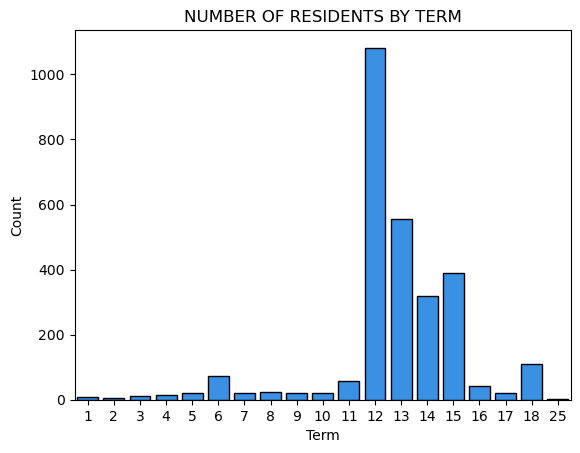

In [12]:
e.countplot(train, 'term', 'dodgerblue')

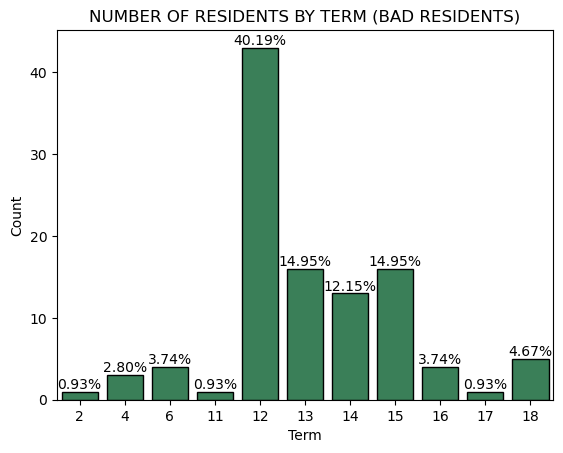

In [13]:
e.countplot_n(train, 'term', 'seagreen', bad = True)

**Takeaways**

- Residents with a longer term contract are causing more damage, which makes sense because they are at the apartment for longer time.

**Ran a $Chi^2$ to evaluate if damage (short term renters more likely to or not) is more prevelant among short term renters** <br>

$H_0$: Term lease is not dependent on damage<br>
$H_a$: Term lease is dependent on damage

 - Confidence interval of 95%
 - Alpha is .05

In [14]:
e.chi_test(train, col = 'term')

We fail to reject the null hypothesis.

Chi2 = 24.848
P-value = 0.129


**Takeaways**

- From our stats test We fail to reject the null hypothesis. Meaning term lease and damage have not dependency. 
- From our countplots we see damage is mostly caused within the 12 to 15 month term lease compared to the other term lease. So it seem significant enough to apply to our models to see what we get back

____

### *9. What is the most common damage code?*

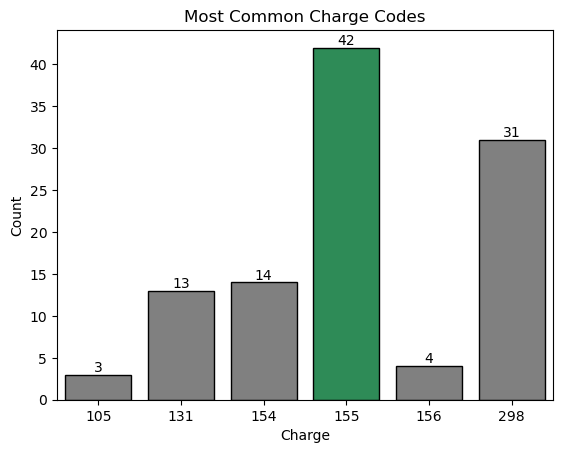

In [15]:
e.get_common(train)

**Takeaways**

- Charge code 155 is a charge code for damage to various things within the property.

____

### *8. Do certain property have more damages?*

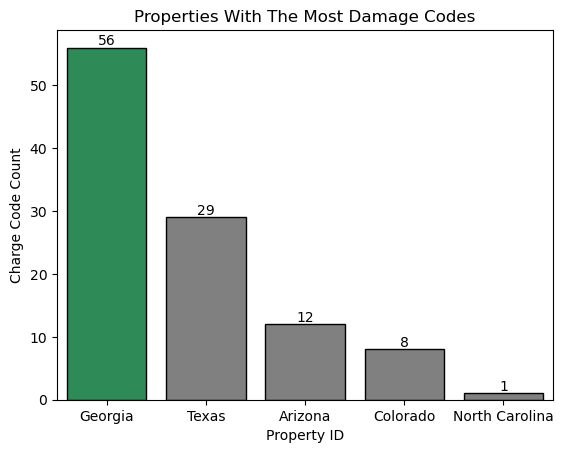

In [16]:
e.plot_bad_properties(train)

**Takeaways**

- Georgia seems to have the most properties with damage charges

____

# Exploration Summary

**- TBD**<br>
**- TBD<br>**
**- TBD**
 
 ------

# Modeling 

- Goal is to minimize Recall, so this will be my evaluation metric
- Ran over 200,000 models with the following algorithmns: Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and XGBoost 
- Before modeling scaled data and split
- I evaluated the models on train and validate data 
- The best performing model then was evaluated on test data subset

In [17]:
y_train, y_val, y_test, train_scaled, val_scaled, test_scaled = w.model_prep(df)

In [18]:
# wrote a function to scale my train, validate, and test data subsets
train_scaled, validate_scaled, test_scaled = m.mvp_scaled_data(train, validate, test)

NameError: name 'm' is not defined

In [ ]:
# looking at one line of data in our scaled data
train_scaled.head(1)

In [ ]:
# calling a function I wrote in my modeling.py to split my data in to X/y train, validate, test
X_train, y_train, X_validate,y_validate, X_test, y_test = m.splitting_subsets(train, train_scaled, validate_scaled, test_scaled)

In [ ]:
# a look to 1st observation of our scaled, split, train subset
X_train.head(1)

In [ ]:
# called my function that in my modeling.py to demostrate my 3 best models and the baseline
# this includes the train rmse, validate rmse, and their difference 

m.best_models(X_train, y_train, X_validate, y_validate)

### Modeling Summary & Evaluation 

**The best performing model is the linear polynomial, so we tested the model with the test data**

In [ ]:
# this is the best model and ran the test data on it
m.best_model(X_train, y_train, X_validate, y_validate, X_test, y_test)

------

<div class="alert alert-info">
    <header>
    <h2>Conclusions:</h2>    
</header>    
<dt>
    
Home value predictions were used by minimizing RMSE within our models. County and transaction month have proven to be the most valuable, but there is still room for improvement.
<br>        
Best Model's performance:

- My best model reduced the root mean squared error by 82500 dollars compared to the baseline results.

- RMSE 82493.41 dollars on in-sample (train), RMSE 84100.76 dollars on out-of-sample data (validate) and RMSE of 80897.87 dollars on the test data.</dt>

<header>
    <h2>Recommendations:</h2>        
</header>      
<dl>
    
- I would recommend using counties and transaction months to build models to predict home values. 

- I would also recommend collecting more data about the homes. For example, crime rates in the county, average salary within neighborhoods, and school rankings.
 

<header>
    <h2> Next Steps:</h2>       
</header> 
</dl>
    
- I would add more columns/features from the database to see if there are better relationships to help predict price.

- Consider adding different hyperparameters to models for better results.  

</div>